## BC Liberal Party Donations in 2016-2017

The BC Liberal Party [disclosed donations](https://www.bcliberals.com/realtime-disclosure/) received during the run-up to the 41st British Columbia general election held May 9, 2017. The data was shared in the form of PDF files containing donations during time intervals of varying length. In this format, the disclosed donations data is not presented for easy analysis using a computer.

Disclosed donations data were munged into CSV format. The collection is available as an [open Google docs spreadsheet](https://docs.google.com/spreadsheets/d/1K26qXaaKPaXV4FAmce9W7xX_lCy2RGfDSBO2lwRxfkA/edit?usp=sharing).

<img src="https://wwejubwfy.s3.amazonaws.com/Real-time_Disclosure_-_Todays_BC_Liberals_2017-08-06_16-52-21.png" alt="BC Liberals Screen Capture" align="right" width="400"> 

This notebook explores the donations data and achieves the following objectives:

* Plot Donations vs. Time. 
* List the top donors by accumulating across all disclosed transactions.
* Identify all donors matching a `string`.
* Explore donations made by UBCBoG members.





## Set up some tools

In [8]:
import pandas as pd
import numpy as np
from datetime import *
from dateutil.relativedelta import *
import calendar
from dateutil.rrule import *
from dateutil.parser import *
import matplotlib.pyplot as plt 
from bokeh.plotting import output_notebook

In [9]:
# from bokeh.plotting import figure, output_notebook, show
# from holoviews import Bar
# from bokeh.models import DatetimeTickFormatter

In [10]:
output_notebook()

Loading BokehJS ...

In [11]:
%matplotlib inline

Source data: 
https://docs.google.com/spreadsheets/d/1K26qXaaKPaXV4FAmce9W7xX_lCy2RGfDSBO2lwRxfkA/edit?usp=sharing

## Import the data

In [12]:
## Import multisheet Google doc in as an Excel file.
xl = pd.ExcelFile('https://docs.google.com/spreadsheets/d/1K26qXaaKPaXV4FAmce9W7xX_lCy2RGfDSBO2lwRxfkA/export?format=xlsx&id', 
                )

In [13]:
xl

In [14]:
## List the names of the sheets in the imported Excel file.
## The sheet names correspond to the filenames used to label the disclosed files.
xl.sheet_names

['Copy-of-2016-Contributions-v4',
 '2017-Contributions-June-2',
 '2017-Contributions-May-26-2017',
 '2017-Contributions-May-19',
 '2017-Contributions-May-12',
 '2017-Contributions-May-5',
 '2017-Contributions-April-28-201',
 '2017-Contributions-April-21',
 '2017-Contributions-April-14',
 '2017-Contributions-April-7',
 '2017-Contributions-March-31-201',
 '2017-Contributions-March-23',
 '2017-Contributions-—-March-17-2',
 '2017-Contributions-March-10',
 '2017-Contributions-March-3-2017',
 '2017-Contributions-_-February-2',
 '2017-Contributions-February-17',
 'Copy-of-2017-Contributions-Janu',
 'Sheet2',
 '2017-Contributions-—-February-3',
 '2017-Contributions-—-February-1',
 'Real-Time-Donations-Jan-25V3']

In [15]:
## Make a dictionary of Pandas Dataframes for each sheet
dict = pd.ExcelFile.parse(xl, sheetname=None)

In [16]:
## Merge the data frames in the dictionary into a single large data frame.
## The `df` file contains the list of disclosed BC Liberal Party data in the form of a Pandas Dataframe.
df = pd.concat(dict)

In [17]:
## List descriptive statistics of the collection of all donations.
df.describe()

,Amount
count,29509.000000
mean,628.985388
std,2279.642803
min,0.000000
25%,36.000000
50%,100.000000
75%,300.000000
max,85000.000000


In [18]:
## Convert Date to a better Format for ordering
df['datetime'] = pd.to_datetime(df['Date'])

In [19]:
## Number of unique Donor Names
len(df['Donor Name'].unique())

15306

There were 29,509 donation transactions reported. These donations were made by 15,306 unique donors. The `mean` donation is \$628.99 with a maximum single donation of \$85,000.

In [20]:
## Calculate total amount donated.
df['Amount'].sum()

18560729.800000001

### Donation Total: \$18,560,729.80

## Analyze donations vs. time

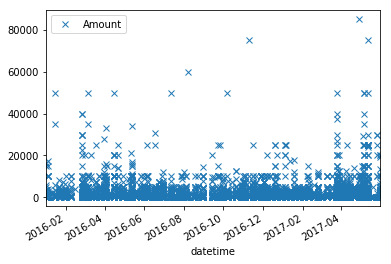

In [21]:
## Plot donations vs. time
df.sort_values(by='datetime').plot(x='datetime',y="Amount", style ="x")

In [22]:
## Accumulate donations vs. time starting from oldest donation
df['cumsum'] = df.sort_values(by='datetime')['Amount'].cumsum()

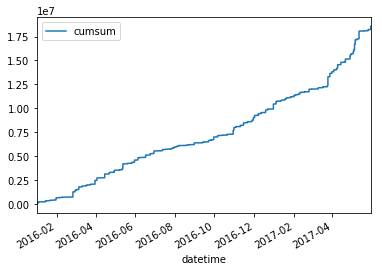

In [23]:
## Accumulated Donations vs. Time
df.plot(x='datetime',y='cumsum')

## Analyze donations based on size

In [24]:
## Restrict attention to donations exceeding a threshold amount
big = df.loc[df['Amount'] > 30000]

In [25]:
## Big Donations as a fraction of total donations
big['Amount'].sum()/df['Amount'].sum()

0.061702853947046846

In [26]:
## 20 biggest single donations
big.sort_values(by="Amount", ascending = False).head(n=20)

Donor Name  \
2017-Contributions-May-5        945                    Sandman Hotels, Inns & Suites Ltd   
2017-Contributions-May-19       433                              Wesgroup Properties Ltd   
Copy-of-2016-Contributions-v4   779                         Aquilini Investment Group LP   
                                6602   Independent Contractors & Businesses Associati...   
                                15516                             Westbridge Finance Inc   
2017-Contributions-May-12       34                          Anthem Properties Group Ltd.   
                                259                                 Interfor Corporation   
Copy-of-2016-Contributions-v4   14013                       Starline Windows (2001) Ltd.   
                                13635                             Shape Properties Corp.   
2017-Contributions-May-19       283                    Maple Ridge Plaza Properties Ltd.   
Copy-of-2016-Contributions-v4   11933                                      Peter Redekop   
2017-Contributions-March-31-201 1665             The Pacific Investment Corporation Ltd.   
Copy-of-2016-Contributions-v4   3481                              Dayhu Investments Ltd.   
                                14471                                  Tech Projects Ltd   
                                6721                                  ITC Management Inc   
2017-Contributions-March-31-201 1360                                   Polygon Homes Ltd   
2017-Contributions-May-12       493                                           Robert Lee   
2017-Contributions-March-31-201 1759                               West Fraser Mills Ltd   
Copy-of-2016-Contributions-v4   1947                     Canadian Classified Network Inc   
                                12149             Progressive Waste Solutions Canada Inc   

                                        Amount                 Date  \
2017-Contributions-May-5        945    85000.0  2017-04-28 00:00:00   
2017-Contributions-May-19       433    75000.0  2017-05-12 00:00:00   
Copy-of-2016-Contributions-v4   779    75000.0  2016-11-10 00:00:00   
                                6602   60000.0  2016-08-07 00:00:00   
                                15516  50000.0  2016-04-15 00:00:00   
2017-Contributions-May-12       34     50000.0  2017-05-06 00:00:00   
                                259    50000.0  2017-05-06 00:00:00   
Copy-of-2016-Contributions-v4   14013  50000.0  2016-03-06 00:00:00   
                                13635  50000.0  2016-07-13 00:00:00   
2017-Contributions-May-19       283    50000.0  2017-05-12 00:00:00   
Copy-of-2016-Contributions-v4   11933  50000.0  2016-01-15 00:00:00   
2017-Contributions-March-31-201 1665   50000.0  2017-03-25 00:00:00   
Copy-of-2016-Contributions-v4   3481   50000.0  2016-10-06 00:00:00   
                                14471  40000.0  2016-02-26 00:00:00   
                                6721   40000.0  2016-02-26 00:00:00   
2017-Contributions-March-31-201 1360   40000.0  2017-03-25 00:00:00   
2017-Contributions-May-12       493    40000.0  2017-05-06 00:00:00   
2017-Contributions-March-31-201 1759   37500.0  2017-03-25 00:00:00   
Copy-of-2016-Contributions-v4   1947   35000.0  2016-01-15 00:00:00   
                                12149  35000.0  2016-03-06 00:00:00   

                                        datetime       cumsum  
2017-Contributions-May-5        945   2017-04-28  15239725.38  
2017-Contributions-May-19       433   2017-05-12  18053801.51  
Copy-of-2016-Contributions-v4   779   2016-11-10   8234965.96  
                                6602  2016-08-07   6123515.38  
                                15516 2016-04-15   3092883.44  
2017-Contributions-May-12       34    2017-05-06  16739929.01  
                                259   2017-05-06  16994279.01  
Copy-of-2016-Contributions-v4   14013 2016-03-06   1788467.44  
                                13635 2016-07-13   5701462.88  
2017-Contribu

## Identify donations based on a `string` in 'Donor Name'

In [27]:
def df_filter(name):
    return df.loc[df['Donor Name'].str.contains(name)].sort_values(by='datetime')

In [41]:
df_filter('Retailers')

Donor Name  Amount  \
Copy-of-2016-Contributions-v4   911  Automotive Retailers Association  1750.0   
                                912  Automotive Retailers Association   625.0   
                                913  Automotive Retailers Association  2300.0   
                                914  Automotive Retailers Association   300.0   
                                915  Automotive Retailers Association  1150.0   
                                916  Automotive Retailers Association   700.0   
Copy-of-2017-Contributions-Janu 10   Automotive Retailers Association   300.0   
2017-Contributions-—-February-3 34   Automotive Retailers Association   875.0   
                                35   Automotive Retailers Association  1750.0   
2017-Contributions-—-February-1 12   Automotive Retailers Association   250.0   
2017-Contributions-—-March-17-2 5    Automotive Retailers Association   500.0   

                                                    Date   datetime  \
Copy-of-2016-Contributions-v4   911  2016-01-01 00:00:00 2016-01-01   
                                912  2016-02-29 00:00:00 2016-02-29   
                                913  2016-03-31 00:00:00 2016-03-31   
                                914  2016-05-31 00:00:00 2016-05-31   
                                915  2016-05-31 00:00:00 2016-05-31   
                                916  2016-08-17 00:00:00 2016-08-17   
Copy-of-2017-Contributions-Janu 10             1/13/2017 2017-01-13   
2017-Contributions-—-February-3 34   2017-01-27 00:00:00 2017-01-27   
                                35   2017-02-01 00:00:00 2017-02-01   
2017-Contributions-—-February-1 12   2017-02-03 00:00:00 2017-02-03   
2017-Contributions-—-March-17-2 5    2017-03-10 00:00:00 2017-03-10   

                                          cumsum  
Copy-of-2016-Contributions-v4   911     12600.00  
                                912   1370150.44  
                                913   2102728.44  
                                914   4558536.45  
                                915   4564366.45  
                                916   6135315.38  
Copy-of-2017-Contributions-Janu 10   10818058.78  
2017-Contributions-—-February-3 34   11202575.63  
                                35   11262125.63  
2017-Contributions-—-February-1 12   11416550.63  
2017-Contributions-—-March-17-2 5    12065799.34

In [30]:
df_filter('Encana')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   4611  Encana Corporation Ltd   1000.0   
                                4612  Encana Corporation Ltd  10000.0   
                                4613  Encana Corporation Ltd   1500.0   
                                4614  Encana Corporation Ltd   1500.0   
                                4616  Encana Corporation Ltd    750.0   
                                4617  Encana Corporation Ltd   5000.0   
                                4615  Encana Corporation Ltd   8000.0   
                                4618  Encana Corporation Ltd   5000.0   
                                4619  Encana Corporation Ltd    500.0   
                                4620  Encana Corporation Ltd    300.0   
                                4621  Encana Corporation Ltd  25000.0   
                                4622  Encana Corporation Ltd   5200.0   
                                4623  Encana Corporation Ltd   1500.0   
Real-Time-Donations-Jan-25V3    572   Encana Corporation Ltd  17500.0   
2017-Contributions-March-31-201 544   Encana Corporation Ltd   3700.0   
2017-Contributions-April-21     403   Encana Corporation Ltd    250.0   
2017-Contributions-May-5        326   Encana Corporation Ltd  29500.0   
2017-Contributions-May-19       147   Encana Corporation Ltd   5000.0   

                                                     Date   datetime  \
Copy-of-2016-Contributions-v4   4611  2016-02-26 00:00:00 2016-02-26   
                                4612  2016-03-24 00:00:00 2016-03-24   
                                4613  2016-04-15 00:00:00 2016-04-15   
                                4614  2016-04-22 00:00:00 2016-04-22   
                                4616  2016-05-20 00:00:00 2016-05-20   
                                4617  2016-05-27 00:00:00 2016-05-27   
                                4615  2016-06-05 00:00:00 2016-06-05   
                                4618  2016-06-24 00:00:00 2016-06-24   
                                4619  2016-07-13 00:00:00 2016-07-13   
                                4620  2016-07-15 00:00:00 2016-07-15   
                                4621  2016-09-22 00:00:00 2016-09-22   
                                4622  2016-10-31 00:00:00 2016-10-31   
                                4623  2016-12-19 00:00:00 2016-12-19   
Real-Time-Donations-Jan-25V3    572   2017-01-11 00:00:00 2017-01-11   
2017-Contributions-March-31-201 544   2017-03-28 00:00:00 2017-03-28   
2017-Contributions-April-21     403   2017-04-14 00:00:00 2017-04-14   
2017-Contributions-May-5        326   2017-05-04 00:00:00 2017-05-04   
2017-Contributions-May-19       147   2017-05-12 00:00:00 2017-05-12   

                                           cumsum  
Copy-of-2016-Contributions-v4   4611   1147310.44  
                                4612   2086525.44  
                                4613   2816448.44  
                                4614   3202678.44  
                                4616   4241072.78  
                                4617   4363478.11  
                                4615   4669701.45  
                                4618   5201365.78  
                                4619   5605597.88  
                                4620   5724372.88  
                                4621   6641549.54  
                                4622   7863872.96  
                                4623   9754678.36  
Real-Time-Donations-Jan-25V3    572   10805103.78  
2017-Contributions-March-31-201 544   13431757.53  
2017-Contributions-April-21     403   14658385.86  
2017-Contributions-May-5        326   16022469.49  
2017-Contributions-May-19       147   17318690.01

In [31]:
df_filter('Encana')['Amount'].sum()

121200.0

In [32]:
df_filter('Ledcor')

Donor Name  Amount  \
Copy-of-2016-Contributions-v4   9070  Ledcor Industries Inc.  9000.0   
                                9069  Ledcor Industries Inc.  7500.0   
                                9067  Ledcor Industries Inc.  5000.0   
                                9068  Ledcor Industries Inc.   700.0   
                                9071  Ledcor Industries Inc.  1200.0   
                                9072  Ledcor Industries Inc.  2000.0   
                                9073  Ledcor Industries Inc.  5100.0   
Real-Time-Donations-Jan-25V3    595   Ledcor Industries Inc.  1000.0   
2017-Contributions-March-31-201 1028  Ledcor Industries Inc.  1000.0   
2017-Contributions-April-28-201 277   Ledcor Industries Inc.  1000.0   
2017-Contributions-May-5        666   Ledcor Industries Inc.  5000.0   
2017-Contributions-May-12       332   Ledcor Industries Inc.  1300.0   

                                                     Date   datetime  \
Copy-of-2016-Contributions-v4   9070  2016-05-08 00:00:00 2016-05-08   
                                9069  2016-06-24 00:00:00 2016-06-24   
                                9067  2016-08-04 00:00:00 2016-08-04   
                                9068  2016-10-06 00:00:00 2016-10-06   
                                9071  2016-11-21 00:00:00 2016-11-21   
                                9072  2016-11-28 00:00:00 2016-11-28   
                                9073  2016-12-19 00:00:00 2016-12-19   
Real-Time-Donations-Jan-25V3    595   2017-01-11 00:00:00 2017-01-11   
2017-Contributions-March-31-201 1028  2017-03-28 00:00:00 2017-03-28   
2017-Contributions-April-28-201 277   2017-04-21 00:00:00 2017-04-21   
2017-Contributions-May-5        666   2017-05-03 00:00:00 2017-05-03   
2017-Contributions-May-12       332   2017-05-05 00:00:00 2017-05-05   

                                           cumsum  
Copy-of-2016-Contributions-v4   9070   3592482.44  
                                9069   5151360.78  
                                9067   6003540.38  
                                9068   7105143.35  
                                9071   8514081.96  
                                9072   8723601.69  
                                9073   9717643.36  
Real-Time-Donations-Jan-25V3    595   10760763.67  
2017-Contributions-March-31-201 1028  13513287.53  
2017-Contributions-April-28-201 277   14971133.38  
2017-Contributions-May-5        666   15866549.49  
2017-Contributions-May-12       332   16323461.82

In [34]:
df_filter('LNG')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   11439  Pacific Northwest LNG Ltd.    500.0   
                                14016         Steelhead LNG Corp.   4000.0   
                                14017         Steelhead LNG Corp.   4000.0   
                                11441  Pacific Northwest LNG Ltd.   2500.0   
                                15791          Woodfibre LNG Ltd.  10000.0   
                                15792          Woodfibre LNG Ltd.   1000.0   
                                14018         Steelhead LNG Corp.   7500.0   
                                11440  Pacific Northwest LNG Ltd.   1250.0   
                                15793          Woodfibre LNG Ltd.   5000.0   
                                11438      Pacific North West LNG   1000.0   
                                15794          Woodfibre LNG Ltd.   5000.0   
Copy-of-2017-Contributions-Janu 203            Woodfibre LNG Ltd.   7500.0   
2017-Contributions-—-February-1 186            Woodfibre LNG Ltd.   4500.0   
2017-Contributions-February-17  159                 Steelhead LNG    300.0   
2017-Contributions-March-10     159                 Steelhead LNG    300.0   
2017-Contributions-—-March-17-2 162                 Steelhead LNG   2225.0   
2017-Contributions-April-7      720            Woodfibre LNG Ltd.   7500.0   
2017-Contributions-April-14     740            Woodfibre LNG Ltd.   2500.0   
2017-Contributions-April-21     1310           Woodfibre LNG Ltd.  10000.0   
2017-Contributions-April-28-201 507            Woodfibre LNG Ltd.   2500.0   
2017-Contributions-May-5        1117           Woodfibre LNG Ltd.   2000.0   
                                1118           Woodfibre LNG Ltd.  10000.0   
2017-Contributions-May-19       402                 Steelhead LNG   4000.0   
2017-Contributions-June-2       419           Pacific Rim LNG Ltd    250.0   

                                                      Date   datetime  \
Copy-of-2016-Contributions-v4   11439  2016-01-01 00:00:00 2016-01-01   
                                14016  2016-02-15 00:00:00 2016-02-15   
                                14017  2016-02-29 00:00:00 2016-02-29   
                                11441  2016-02-29 00:00:00 2016-02-29   
                                15791  2016-04-22 00:00:00 2016-04-22   
                                15792  2016-06-24 00:00:00 2016-06-24   
                                14018  2016-06-24 00:00:00 2016-06-24   
                                11440  2016-08-01 00:00:00 2016-08-01   
                                15793  2016-11-15 00:00:00 2016-11-15   
                                11438  2016-12-08 00:00:00 2016-12-08   
                                15794  2016-12-22 00:00:00 2016-12-22   
Copy-of-2017-Contributions-Janu 203              1/18/2017 2017-01-18   
2017-Contributions-—-February-1 186    2017-02-08 00:00:00 2017-02-08   
2017-Contributions-February-17  159    2017-02-10 00:00:00 2017-02-10   
2017-Contributions-March-10     159    2017-02-10 00:00:00 2017-02-10   
2017-Contributions-—-March-17-2 162    2017-03-10 00:00:00 2017-03-10   
2017-Contributions-April-7      720    2017-04-03 00:00:00 2017-04-03   
2017-Contributions-April-14     740    2017-04-09 00:00:00 2017-04-09   
2017-Contributions-April-21     1310   2017-04-14 00:00:00 2017-04-14   
2017-Contributions-April-28-201 507    2017-04-21 00:00:00 2017-04-21   
2017-Contributions-May-5        1117   2017-04-29 00:00:00 2017-04-29   
                                1118   2017-05-03 00:00:00 2017-05-03   
2017-Contributions-May-19       402    2017-05-12 00:00:00 2017-05-12   
2017-Contributions-June-2       419    2017-05-30 00:00:00 2017-05-30   

                                            cumsum  
Copy-of-2016-Contributions-v4   11439     10850.00  
                                14016    750390.44  
                                14017   1330105.44  
                                11441   1415020.44  
             

In [39]:
df_filter('Telus')

Donor Name  Amount  \
Copy-of-2016-Contributions-v4   14507                 Telus   250.0   
                                14508                 Telus  2500.0   
                                14509                 Telus   450.0   
                                14510                 Telus  7500.0   
                                14511                 Telus  5000.0   
                                14512                 Telus   300.0   
                                14513                 Telus  1300.0   
                                14514                 Telus  4450.0   
                                14516                 Telus  1250.0   
                                14517                 Telus   500.0   
                                14519  Telus Communications  2000.0   
                                14518                 Telus  1500.0   
2017-Contributions-—-February-1 171                   Telus  1200.0   
2017-Contributions-_-February-2 124                   Telus   380.0   
2017-Contributions-March-3-2017 1231                  Telus  5000.0   
2017-Contributions-April-14     688                   Telus  2000.0   
2017-Contributions-April-21     1211                  Telus  5000.0   

                                                      Date   datetime  \
Copy-of-2016-Contributions-v4   14507  2016-01-01 00:00:00 2016-01-01   
                                14508  2016-01-22 00:00:00 2016-01-22   
                                14509  2016-01-31 00:00:00 2016-01-31   
                                14510  2016-03-02 00:00:00 2016-03-02   
                                14511  2016-03-31 00:00:00 2016-03-31   
                                14512  2016-04-15 00:00:00 2016-04-15   
                                14513  2016-05-31 00:00:00 2016-05-31   
                                14514  2016-06-30 00:00:00 2016-06-30   
                                14516  2016-10-30 00:00:00 2016-10-30   
                                14517  2016-10-31 00:00:00 2016-10-31   
                                14519  2016-11-30 00:00:00 2016-11-30   
                                14518  2016-11-30 00:00:00 2016-11-30   
2017-Contributions-—-February-1 171    2017-02-03 00:00:00 2017-02-03   
2017-Contributions-_-February-2 124    2017-02-17 00:00:00 2017-02-17   
2017-Contributions-March-3-2017 1231   2017-02-24 00:00:00 2017-02-24   
2017-Contributions-April-14     688    2017-04-07 00:00:00 2017-04-07   
2017-Contributions-April-21     1211   2017-04-14 00:00:00 2017-04-14   

                                            cumsum  
Copy-of-2016-Contributions-v4   14507     75850.00  
                                14508    379822.79  
                                14509    627937.09  
                                14510   1495920.44  
                                14511   2238668.44  
                                14512   3116243.44  
                                14513   4551621.45  
                                14514   5549187.88  
                                14516   7386385.60  
                                14517   7855587.96  
                                14519   8849172.69  
                                14518   8850772.69  
2017-Contributions-—-February-1 171    11383729.63  
2017-Contributions-_-February-2 124    11700150.63  
2017-Contributions-March-3-2017 1231   11920854.34  
2017-Contributions-April-14     688    14101890.86  
2017-Contributions-April-21     1211   14576488.86

In [35]:
df_filter('Bank')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   980                 Bank of Montreal    250.0   
                                6448                HSBC Bank Canada   5000.0   
                                14858          Toronto Dominion Bank   5000.0   
                                6449                HSBC Bank Canada     50.0   
                                14639      The Toronto-Dominion Bank    350.0   
                                981                 Bank of Montreal     20.0   
                                15353                    Wayne Banks    150.0   
                                8454            KEB Hana Bank Canada    300.0   
                                13263           Royal Bank of Canada   1000.0   
                                14859          Toronto Dominion Bank  20000.0   
                                1049   Bard & Banker Pub Company Ltd  12500.0   
                                14640      The Toronto-Dominion Bank    360.0   
                                7033                  James W. Banks    100.0   
Real-Time-Donations-Jan-25V3    469        The Toronto-Dominion Bank     50.0   
                                440             Royal Bank of Canada     25.0   
Copy-of-2017-Contributions-Janu 189            Toronto-Dominion Bank    400.0   
2017-Contributions-—-February-3 490                    TD Bank Group    450.0   
2017-Contributions-March-31-201 1667       The Toronto-Dominion Bank    100.0   
                                1644       The Toronto-Dominion Bank    750.0   
                                736                 HSBC Bank Canada     50.0   
2017-Contributions-April-14     59     Bard & Banker Pub Company Ltd    500.0   
2017-Contributions-May-5        1015         TD Bank Financial Group   5000.0   
2017-Contributions-May-19       414        The Toronto-Dominion Bank  15000.0   

                                                      Date   datetime  \
Copy-of-2016-Contributions-v4   980    2016-01-31 00:00:00 2016-01-31   
                                6448   2016-03-02 00:00:00 2016-03-02   
                                14858  2016-03-24 00:00:00 2016-03-24   
                                6449   2016-04-03 00:00:00 2016-04-03   
                                14639  2016-04-22 00:00:00 2016-04-22   
                                981    2016-04-30 00:00:00 2016-04-30   
                                15353  2016-05-08 00:00:00 2016-05-08   
                                8454   2016-05-20 00:00:00 2016-05-20   
                                13263  2016-05-27 00:00:00 2016-05-27   
                                14859  2016-09-13 00:00:00 2016-09-13   
                                1049   2016-10-21 00:00:00 2016-10-21   
                                14640  2016-11-10 00:00:00 2016-11-10   
                                7033   2016-12-31 00:00:00 2016-12-31   
Real-Time-Donations-Jan-25V3    469    2017-01-04 00:00:00 2017-01-04   
                                440    2017-01-04 00:00:00 2017-01-04   
Copy-of-2017-Contributions-Janu 189              1/18/2017 2017-01-18   
2017-Contributions-—-February-3 490    2017-01-27 00:00:00 2017-01-27   
2017-Contributions-March-31-201 1667   2017-03-25 00:00:00 2017-03-25   
                                1644   2017-03-25 00:00:00 2017-03-25   
                                736    2017-03-25 00:00:00 2017-03-25   
2017-Contributions-April-14     59     2017-04-09 00:00:00 2017-04-09   
2017-Contributions-May-5        1015   2017-05-03 00:00:00 2017-05-03   
2017-Contributions-May-19       414    2017-05-12 00:00:00 2017-05-12   

                                            cumsum  
Copy-of-2016-Contributions-v4   980      547793.09  
                                6448    1448195.44  
                                14858   2068255.44  
                                6449    2579401.44  
                                14639   3291665.44  
                                981     34

In [36]:
df_filter('Casino')

Donor Name  \
Copy-of-2016-Contributions-v4   5270   Gateway Casinos and Entertainment Limited   
                                5272   Gateway Casinos and Entertainment Limited   
                                5273   Gateway Casinos and Entertainment Limited   
                                12657                   River Rock Casino Resort   
                                5274   Gateway Casinos and Entertainment Limited   
                                5276   Gateway Casinos and Entertainment Limited   
                                5288   Gateway Casinos and Entertainment Limited   
                                5300   Gateway Casinos and Entertainment Limited   
                                4449                             Elements Casino   
                                5278   Gateway Casinos and Entertainment Limited   
                                5279   Gateway Casinos and Entertainment Limited   
                                5292   Gateway Casinos and Entertainment Limited   
                                5281   Gateway Casinos and Entertainment Limited   
                                2179                         Cascades Casino Ltd   
                                5282   Gateway Casinos and Entertainment Limited   
                                5283   Gateway Casinos and Entertainment Limited   
                                13982            St. Eugene Golf Resort & Casino   
                                5285   Gateway Casinos and Entertainment Limited   
                                5286   Gateway Casinos and Entertainment Limited   
                                5287   Gateway Casinos and Entertainment Limited   
                                13983            St. Eugene Golf Resort & Casino   
                                5284   Gateway Casinos and Entertainment Limited   
                                5289   Gateway Casinos and Entertainment Limited   
                                5290   Gateway Casinos and Entertainment Limited   
                                13984            St. Eugene Golf Resort & Casino   
                                5291   Gateway Casinos and Entertainment Limited   
                                5293   Gateway Casinos and Entertainment Limited   
                                5294   Gateway Casinos and Entertainment Limited   
                                5271   Gateway Casinos and Entertainment Limited   
                                5280   Gateway Casinos and Entertainment Limited   
                                5295   Gateway Casinos and Entertainment Limited   
                                5296   Gateway Casinos and Entertainment Limited   
                                5297   Gateway Casinos and Entertainment Limited   
                                5298   Gateway Casinos and Entertainment Limited   
                                5299   Gateway Casinos and Entertainment Limited   
                                5277   Gateway Casinos and Entertainment Limited   
                                5301   Gateway Casinos and Entertainment Limited   
                                5275   Gateway Casinos and Entertainment Limited   
                                5302   Gateway Casinos and Entertainment Limited   
                                5303   Gateway Casinos and Entertainment Limited   
Copy-of-2017-Contributions-Janu 64     Gateway Casinos and Entertainment Limited   
Sheet2                          357                              Gateway Casinos   
                                358    Gateway Casinos and Entertainment Limited   
2017-Contributions-—-February-3 176                              Gateway Casinos   
2017-Contributions-_-February-2 35     Gateway Casinos and Entertainment Limited   
2017-Contributions-March-31-201 613    Gateway Casinos and Entertainment Limited   
                                614    Gateway Casinos and Entertainment Limited   
2017-Contributions-April-21     455   

In [37]:
df_filter('Casino')['Amount'].sum()

116052.73999999999

In [38]:
df_filter('Ernst')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   4732  Ernst & Young LLP    250.0   
                                4733  Ernst & Young LLP  10000.0   
                                1769  Bruce Ernst Pydee    200.0   
                                4730      Ernst & Young   4000.0   
                                4731      Ernst & Young    200.0   
                                8355         Karl Ernst     35.0   
                                4734  Ernst & Young LLP   3500.0   
                                4735  Ernst & Young LLP   4500.0   
Real-Time-Donations-Jan-25V3    290          Karl Ernst     25.0   
2017-Contributions-—-February-3 160   Ernst & Young LLP   3500.0   

                                                     Date   datetime  \
Copy-of-2016-Contributions-v4   4732  2016-01-01 00:00:00 2016-01-01   
                                4733  2016-03-31 00:00:00 2016-03-31   
                                1769  2016-07-31 00:00:00 2016-07-31   
                                4730  2016-07-31 00:00:00 2016-07-31   
                                4731  2016-09-29 00:00:00 2016-09-29   
                                8355  2016-10-31 00:00:00 2016-10-31   
                                4734  2016-12-12 00:00:00 2016-12-12   
                                4735  2016-12-19 00:00:00 2016-12-19   
Real-Time-Donations-Jan-25V3    290   2017-01-04 00:00:00 2017-01-04   
2017-Contributions-—-February-3 160   2017-02-01 00:00:00 2017-02-01   

                                           cumsum  
Copy-of-2016-Contributions-v4   4732    121225.00  
                                4733   2390868.44  
                                1769   5925572.63  
                                4730   5919218.88  
                                4731   6727990.10  
                                8355   7704379.60  
                                4734   9465647.66  
                                4735   9821501.36  
Real-Time-Donations-Jan-25V3    290   10476198.67  
2017-Contributions-—-February-3 160   11255375.63

In [39]:
df_filter('Seaspan')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   13558                Seaspan ULC   1000.0   
                                13559              Seaspan ULC 1      0.0   
                                13560                Seaspan ULC   5000.0   
                                13557  Seaspan International Ltd  15000.0   
                                13561                Seaspan ULC   1050.0   
2017-Contributions-March-3-2017 1151                 Seaspan ULC   5000.0   
2017-Contributions-March-31-201 1540                 Seaspan ULC   1000.0   
2017-Contributions-April-21     1130                 Seaspan ULC   1000.0   
2017-Contributions-May-19       392                  Seaspan ULC  15000.0   

                                                      Date   datetime  \
Copy-of-2016-Contributions-v4   13558  2016-01-31 00:00:00 2016-01-31   
                                13559  2016-02-26 00:00:00 2016-02-26   
                                13560  2016-03-31 00:00:00 2016-03-31   
                                13557  2016-05-13 00:00:00 2016-05-13   
                                13561  2016-06-17 00:00:00 2016-06-17   
2017-Contributions-March-3-2017 1151   2017-02-24 00:00:00 2017-02-24   
2017-Contributions-March-31-201 1540   2017-03-25 00:00:00 2017-03-25   
2017-Contributions-April-21     1130   2017-04-14 00:00:00 2017-04-14   
2017-Contributions-May-19       392    2017-05-12 00:00:00 2017-05-12   

                                            cumsum  
Copy-of-2016-Contributions-v4   13558    506793.09  
                                13559   1093755.44  
                                13560   2306368.44  
                                13557   3961107.11  
                                13561   5084075.78  
2017-Contributions-March-3-2017 1151   11898429.17  
2017-Contributions-March-31-201 1540   12701904.39  
2017-Contributions-April-21     1130   14560783.86  
2017-Contributions-May-19       392    17791001.51

In [40]:
df_filter('Polygon')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   12056  Polygon Homes Ltd    500.0   
                                12057  Polygon Homes Ltd  15000.0   
                                12058  Polygon Homes Ltd  10000.0   
                                12059  Polygon Homes Ltd   1500.0   
2017-Contributions-March-31-201 1360   Polygon Homes Ltd  40000.0   
2017-Contributions-May-12       452    Polygon Homes Ltd  10000.0   

                                                      Date   datetime  \
Copy-of-2016-Contributions-v4   12056  2016-01-29 00:00:00 2016-01-29   
                                12057  2016-04-15 00:00:00 2016-04-15   
                                12058  2016-05-13 00:00:00 2016-05-13   
                                12059  2016-11-15 00:00:00 2016-11-15   
2017-Contributions-March-31-201 1360   2017-03-25 00:00:00 2017-03-25   
2017-Contributions-May-12       452    2017-05-05 00:00:00 2017-05-05   

                                            cumsum  
Copy-of-2016-Contributions-v4   12056    442038.09  
                                12057   3041158.44  
                                12058   4188977.78  
                                12059   8442131.96  
2017-Contributions-March-31-201 1360   13138710.53  
2017-Contributions-May-12       452    16520391.82

In [41]:
df_filter('Car Dealers')

Donor Name  \
Copy-of-2016-Contributions-v4   11088  New Car Dealers Association of BC   
                                11089  New Car Dealers Association of BC   
                                11090  New Car Dealers Association of BC   
                                11092  New Car Dealers Association of BC   
                                11100  New Car Dealers Association of BC   
                                11106  New Car Dealers Association of BC   
                                11093  New Car Dealers Association of BC   
                                11094  New Car Dealers Association of BC   
                                11102  New Car Dealers Association of BC   
                                11096  New Car Dealers Association of BC   
                                11103  New Car Dealers Association of BC   
                                11097  New Car Dealers Association of BC   
                                11098  New Car Dealers Association of BC   
                                11099  New Car Dealers Association of BC   
                                11101  New Car Dealers Association of BC   
                                11095  New Car Dealers Association of BC   
                                11104  New Car Dealers Association of BC   
                                11105  New Car Dealers Association of BC   
                                11091  New Car Dealers Association of BC   
                                11107  New Car Dealers Association of BC   
Real-Time-Donations-Jan-25V3    532    New Car Dealers Association of BC   
Sheet2                          718          New Car Dealers Association   
2017-Contributions-—-February-3 378    New Car Dealers Association of BC   
2017-Contributions-March-10     128    New Car Dealers Association of BC   
2017-Contributions-February-17  128    New Car Dealers Association of BC   
2017-Contributions-_-February-2 86     New Car Dealers Association of BC   
2017-Contributions-—-March-17-2 118          New Car Dealers Association   
2017-Contributions-March-23     95           New Car Dealers Association   
2017-Contributions-March-31-201 1247         New Car Dealers Association   
2017-Contributions-April-14     503    New Car Dealers Association of BC   
                                504    New Car Dealers Association of BC   
2017-Contributions-May-12       405    New Car Dealers Association of BC   
                                406    New Car Dealers Association of BC   

                                        Amount                 Date  \
Copy-of-2016-Contributions-v4   11088   6000.0  2016-01-15 00:00:00   
                                11089   8500.0  2016-01-22 00:00:00   
                                11090    500.0  2016-01-31 00:00:00   
                                11092   2000.0  2016-02-29 00:00:00   
                                11100   1500.0  2016-03-06 00:00:00   
                                11106   8500.0  2016-03-11 00:00:00   
                                11093   5000.0  2016-03-24 00:00:00   
                                11094  10000.0  2016-03-31 00:00:00   
                                11102    300.0  2016-04-07 00:00:00   
                                11096   1250.0  2016-04-30 00:00:00   
                                11103   7250.0  2016-05-08 00:00:00   
                                11097   2200.0  2016-05-13 00:00:00   
                                11098   3000.0  2016-05-20 00:00:00   
                                11099   1500.0  2016-05-31 00:00:00   
                                11101  30750.0  2016-06-17 00:00:00   
                                11095   5000.0  2016-08-04 00:00:00   
                                11104   9600.0  2016-09-16 00:00:00   
                                11105   2000.0  2016-09-30 00:00:00   
                                11091   3000.0  2016-12-02 00:00:00   
                                11107   2000.0  2016-12-1

In [67]:
df_filter('Car Dealers')['Amount'].sum()

142600.0

In [42]:
df_filter('Aquilini')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   774  Aquilini Investment Group LP   2500.0   
                                777  Aquilini Investment Group LP  10000.0   
                                775  Aquilini Investment Group LP   2500.0   
                                776  Aquilini Investment Group LP  10000.0   
                                778  Aquilini Investment Group LP  25000.0   
                                780  Aquilini Investment Group LP   5000.0   
                                781  Aquilini Investment Group LP   1000.0   
                                779  Aquilini Investment Group LP  75000.0   
2017-Contributions-—-February-3 25      Aquilini Investment Group   2500.0   
                                26           Aquilini Investments   2500.0   
2017-Contributions-March-31-201 86   Aquilini Investment Group LP   2400.0   

                                                    Date   datetime  \
Copy-of-2016-Contributions-v4   774  2016-01-01 00:00:00 2016-01-01   
                                777  2016-01-04 00:00:00 2016-01-04   
                                775  2016-01-31 00:00:00 2016-01-31   
                                776  2016-02-26 00:00:00 2016-02-26   
                                778  2016-04-22 00:00:00 2016-04-22   
                                780  2016-10-30 00:00:00 2016-10-30   
                                781  2016-10-31 00:00:00 2016-10-31   
                                779  2016-11-10 00:00:00 2016-11-10   
2017-Contributions-—-February-3 25   2017-01-27 00:00:00 2017-01-27   
                                26   2017-01-27 00:00:00 2017-01-27   
2017-Contributions-March-31-201 86   2017-03-28 00:00:00 2017-03-28   

                                          cumsum  
Copy-of-2016-Contributions-v4   774     78350.00  
                                777    220045.00  
                                775    667362.09  
                                776    983310.44  
                                778   3328120.44  
                                780   7479604.85  
                                781   7713993.60  
                                779   8234965.96  
2017-Contributions-—-February-3 25   11185925.63  
                                26   11188425.63  
2017-Contributions-March-31-201 86   13536152.53

In [43]:
df_filter('Robert J Macdonald')

Donor Name   Amount  \
Copy-of-2016-Contributions-v4   12784  Robert J Macdonald    500.0   
                                12789  Robert J Macdonald   1000.0   
                                12788  Robert J Macdonald    500.0   
                                12786  Robert J Macdonald  10000.0   
                                12787  Robert J Macdonald   1000.0   
                                12785  Robert J Macdonald  10000.0   
Real-Time-Donations-Jan-25V3    426    Robert J Macdonald   1000.0   
2017-Contributions-March-31-201 1453   Robert J Macdonald   3000.0   

                                                      Date   datetime  \
Copy-of-2016-Contributions-v4   12784  2016-01-31 00:00:00 2016-01-31   
                                12789  2016-03-11 00:00:00 2016-03-11   
                                12788  2016-05-08 00:00:00 2016-05-08   
                                12786  2016-05-27 00:00:00 2016-05-27   
                                12787  2016-06-28 00:00:00 2016-06-28   
                                12785  2016-11-03 00:00:00 2016-11-03   
Real-Time-Donations-Jan-25V3    426    2017-01-04 00:00:00 2017-01-04   
2017-Contributions-March-31-201 1453   2017-03-28 00:00:00 2017-03-28   

                                            cumsum  
Copy-of-2016-Contributions-v4   12784    671187.09  
                                12789   1877254.44  
                                12788   3601962.44  
                                12786   4319305.11  
                                12787   5293254.52  
                                12785   8062085.96  
Real-Time-Donations-Jan-25V3    426    10658903.67  
2017-Contributions-March-31-201 1453   13634677.53

In [55]:
df_filter('Insurance')

Donor Name  \
Copy-of-2016-Contributions-v4   6634                 Insurance Brokers Association of BC   
                                6639                          Insurance Bureau of Canada   
                                932                              B & W Insurance Brokers   
                                6647                          Insurance Bureau of Canada   
                                6637                          Insurance Bureau of Canada   
                                6638                          Insurance Bureau of Canada   
                                1464         Boehmer Insurance And Investment Group Inc.   
                                10575                Michael K Wong Magc Insurance Adjus   
                                2008                       Capri Insurance Services Ltd.   
                                6641                          Insurance Bureau of Canada   
                                6642                          Insurance Bureau of Canada   
                                933                              B & W Insurance Brokers   
                                6644                          Insurance Bureau of Canada   
                                6635                 Insurance Brokers Association of BC   
                                6645                          Insurance Bureau of Canada   
                                6640                          Insurance Bureau of Canada   
                                6646                          Insurance Bureau of Canada   
                                6643                          Insurance Bureau of Canada   
                                6041          Halsey Insurance & Investment Services Ltd   
                                14844                                 Tony Lau Insurance   
                                11084           Network Bonding & Insurance Services Inc   
                                6636                          Insurance Bureau of Canada   
                                7985             Johnston Meier Insurance Agencies Group   
                                430                        Allied Insurance Services Inc   
                                485                           AMC Insurance Services Ltd   
                                6042          Halsey Insurance & Investment Services Ltd   
                                6648                          Insurance Bureau of Canada   
                                15417                                 Waypoint Insurance   
                                13336                 RW Schmunk Insurance Services Ltd.   
                                4746                          ES3 Insurance Services Ltd   
Real-Time-Donations-Jan-25V3    318                    Lynn Valley Insurance Agency Ltd.   
                                239                           Insurance Bureau of Canada   
2017-Contributions-—-February-3 238                           Insurance Bureau of Canada   
2017-Contributions-March-3-2017 789                          Londsdale Insurance Brokers   
2017-Contributions-March-31-201 745                           Insurance Bureau of Canada   
                                41                         Allied Insurance Services Inc   
                                746                           Insurance Bureau of Canada   
                                241                 Capital West Insurance Services LTD.   
2017-Contributions-April-7      22                        Allwest Insurance Services Ltd   
                                276                 Greg Andrews Insurance Services Inc.   
2017-Contributions-April-14     474                        Maxxam Insurance Services Inc   
                                73           Boehmer Insurance And Investment Group Inc.   
2017-Contributions-April-21     556                           Insurance Bureau of Canada   
                              

In [57]:
df_filter('Insurance')['Amount'].sum()

82158.0

In [66]:
df_filter('Automotive')['Amount'].sum()

23492.0

## Accumulate donations across 'Donor Name' 

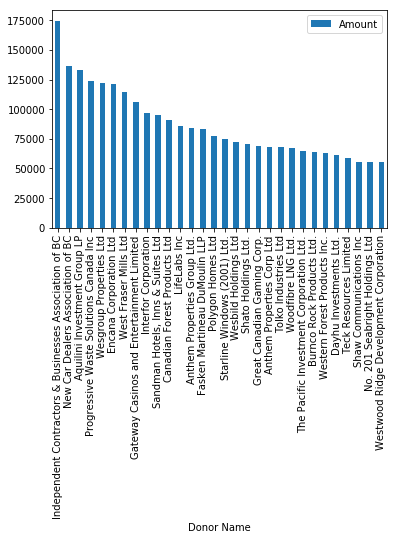

In [44]:
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], 
                                                               ascending=[False]).head(n=30).plot(kind='bar')

In [45]:
## Top 25 Donors 
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], ascending=[False]).head(n=25)

,Amount
Donor Name,
Independent Contractors & Businesses Association of BC,174700.00
New Car Dealers Association of BC,136550.00
Aquilini Investment Group LP,133400.00
Progressive Waste Solutions Canada Inc,123700.00
Wesgroup Properties Ltd,121750.00
Encana Corporation Ltd,121200.00
West Fraser Mills Ltd,114300.00
Gateway Casinos and Entertainment Limited,105738.74
Interfor Corporation,97050.00


In [45]:
## Most frequent Donors 
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = len, values = ['Amount']).sort_values(by=['Amount'], ascending=[False]).head(n=25)

,Amount
Donor Name,
Gateway Casinos and Entertainment Limited,40.0
Great Canadian Gaming Corp.,30.0
New Car Dealers Association of BC,29.0
Insurance Bureau of Canada,23.0
Janet Smukowich,22.0
Independent Contractors & Businesses Association of BC,20.0
LifeLabs Inc,20.0
Stewart Vinnels,19.0
Stephen P. Roberts,19.0


In [46]:
## Donation yield from top 100 donors
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], ascending=[False]).head(n=100)['Amount'].sum()

5012371.4699999997

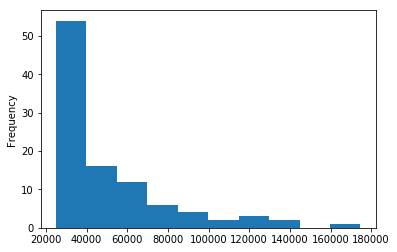

In [48]:
## Donation yield from top 100 donors
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], 
                                        ascending=[False]).head(n=100)['Amount'].plot(kind='hist')

In [44]:
## Fraction of total donations from top 100 donors
pd.pivot_table(df,index=['Donor Name'], 
               aggfunc = sum, 
               values = ['Amount']).sort_values(by=['Amount'], ascending=[False]).head(n=100)['Amount'].sum()/df['Amount'].sum()

0.27005249922877489

In [48]:
len(df['Donor Name'].unique())

15306

## Donation Amount by Day

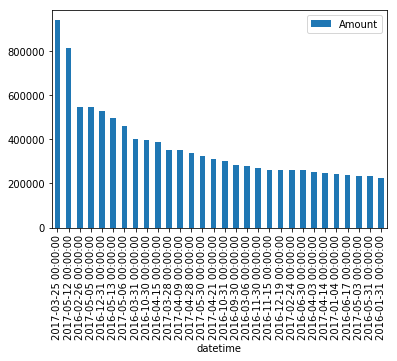

In [49]:
pd.pivot_table(df,index=['datetime'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], 
                                                               ascending=[False]).head(n=30).plot(kind='bar')

In [50]:
pd.pivot_table(df,index=['datetime'], 
               aggfunc = sum, values = ['Amount']).sort_values(by=['Amount'], 
                                                               ascending=[False]).head(n=4)

,Amount
datetime,
2017-03-25,938817.34
2017-05-12,814751.50
2016-02-26,548565.00
2017-05-05,546109.52


The BC Liberal Party received $939K in donations on 2017-03-25.

## Analyzing UBC BoG Donations

Copied from [UBCBoG site](http://bog.ubc.ca/?page_id=12657)

Appointed by the Province

Stuart Belkin (Chair)	December 2018  
Sandra Cawley	December 2018  
Raghwa Gopal	December 2017  
Celeste Haldane	December 2017  
Michael Korenberg (Vice-Chair)	December 2017  
Graham Lee	December 2017  
Fiona Macfarlane	December 2018  
Beverlee Park	December 2017  
Alan Shuster	February 2020  
David Sidoo	December 2017  
Kevin Smith	December 2018  


In [51]:
ubc_board = ['Stuart Belkin',
'Sandra Cawley',
'Raghwa Gopal',
'Celeste Haldane',
'Michael Korenberg',
'Graham Lee',
'Fiona Macfarlan',
'Beverlee Park',
'Alan Shuster',
'David Sidoo',
'Kevin Smith',
]

In [52]:
for name in ubc_board:
    print(name, df_filter(name)['Amount'].sum())

Stuart Belkin 0
Sandra Cawley 0
Raghwa Gopal 1000.0
Celeste Haldane 0
Michael Korenberg 2500.0
Graham Lee 2300.0
Fiona Macfarlan 1800.0
Beverlee Park 0
Alan Shuster 0
David Sidoo 10000.0
Kevin Smith 0


[Alan Shuster used to work for Premier Clark](http://old.ubyssey.ca/news/clark-manager-bog-333/).

In [53]:
df_filter('Graham Lee')

,,Donor Name,Amount,Date,datetime,cumsum
Copy-of-2016-Contributions-v4,5813,Graham Lee,1150.0,2016-04-30 00:00:00,2016-04-30,3389935.44
2017-Contributions-March-3-2017,490,Graham Lee,1150.0,2017-02-24 00:00:00,2017-02-24,11745080.63


In [54]:
df_filter('David Sidoo')

Donor Name  Amount  \
Copy-of-2016-Contributions-v4   3416  David Sidoo  2500.0   
                                3417  David Sidoo  5000.0   
2017-Contributions-March-31-201 390   David Sidoo  2500.0   

                                                     Date   datetime  \
Copy-of-2016-Contributions-v4   3416  2016-01-31 00:00:00 2016-01-31   
                                3417  2016-02-29 00:00:00 2016-02-29   
2017-Contributions-March-31-201 390   2017-03-25 00:00:00 2017-03-25   

                                           cumsum  
Copy-of-2016-Contributions-v4   3416    470908.09  
                                3417   1306830.44  
2017-Contributions-March-31-201 390   13079040.53